# Plotting using matplotlib and seaborn
---

## Goals of this lesson

### Students will learn:

1. How to generate beautiful statistical visualizations in Python using the seaborn package

In [11]:
# load packages we will be using for this lesson
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(12,8)})

---
## 1. Load in sample data (NHANES)
We’re going to practice here on a dataset from the 1990 NHANES (National Health and Nutrition Examination Survey). The variables are below:

- Region - Geographic region in the USA: Northeast (1), Midwest (2), South (3), and West (4)
- Sex - Biological sex: Male (1), Female (2)
- Age - Age measured in months (we’ll convert this to years below)
- Urban - Residential population density: Metropolital Area (1), Other (2)
- Weight - Weight in pounds
- Height - Height in inches
- BMI - BMI, measured in kg/(m^2)

In [12]:
nhanes = pd.read_csv("NHANES1990.csv")
nhanes.head()

,Region,Sex,Age,Urban,Weight,Height,BMI
0,3,2,513,2,171.7,65.3,28.4
1,4,1,307,2,155.2,62.3,28.2
2,4,2,886,1,166.7,59.2,33.5
3,4,1,458,1,224.7,71.9,30.6
4,2,1,888,2,245.0,67.7,37.6


First, let's clean up the data a little bit:

In [13]:
nhanes['Age'] = nhanes['Age']/12
nhanes['Urban'] = nhanes['Urban'].replace({1:'Metro Area',2:'Non-Metro Area'})
nhanes['Region'] = nhanes['Region'].replace({1:'Northeast',2:'Midwest',3:'South',4:'West'})

In [14]:
nhanes.head()

,Region,Sex,Age,Urban,Weight,Height,BMI
0,South,2,42.750000,Non-Metro Area,171.7,65.3,28.4
1,West,1,25.583333,Non-Metro Area,155.2,62.3,28.2
2,West,2,73.833333,Metro Area,166.7,59.2,33.5
3,West,1,38.166667,Metro Area,224.7,71.9,30.6
4,Midwest,1,74.000000,Non-Metro Area,245.0,67.7,37.6


---
## 2. Scatter Plot 

`seaborn` makes creating attractive and publication-quality data visualizations possible with single line commands. We'll start with a scatter plot to look at how some of our variables are distributed by using the `scatterplot()` function.

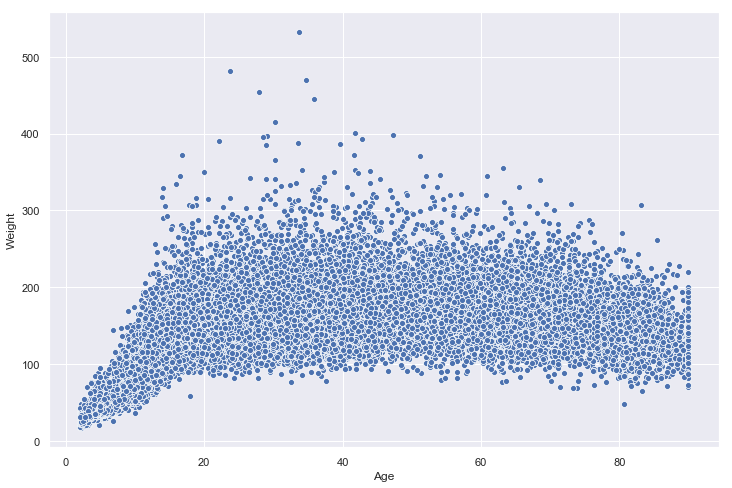

In [15]:
sns.scatterplot(x="Age",y="Weight",data=nhanes);

We can also easily represent other dimensions of the data on this place using the `size` of the points. Let's map that to BMI:

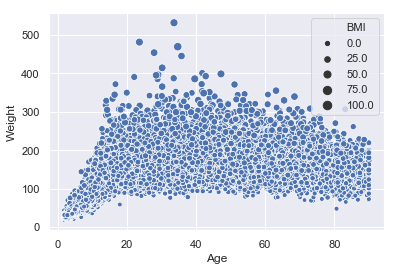

In [5]:
sns.scatterplot(x="Age",y="Weight",data=nhanes,size="BMI");

We can even add a fourth dimension to this visualization by mapping the color of the points to a categorial variable. Let's now use the `hue` argument to represent each point based on whether it is urban or non-urban:

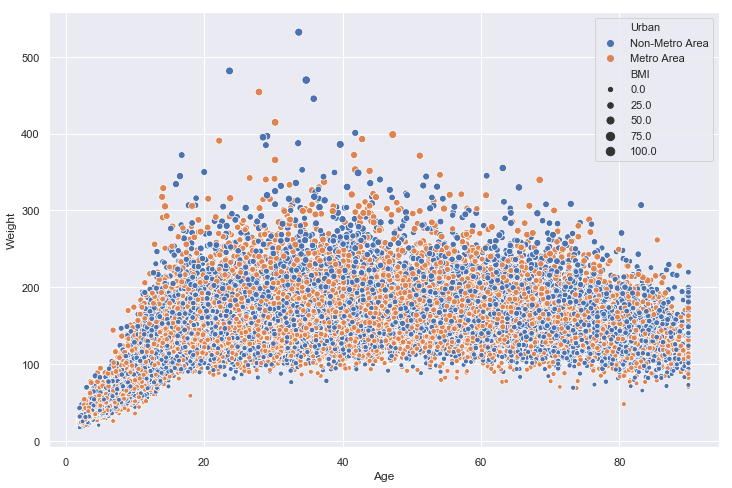

In [13]:
sns.scatterplot(x="Age",y="Weight",data=nhanes,size="BMI",hue="Urban");

There are lots of ways you can vary and customize this visualization using `seaborn`. The package is very well documented and you can check out references with examples for all functions here: https://seaborn.pydata.org/api.html


---
## 3. Histograms and data distributions

We can use the `distplot` function to look at both a histogram and an smoothed estimate of the data distribution

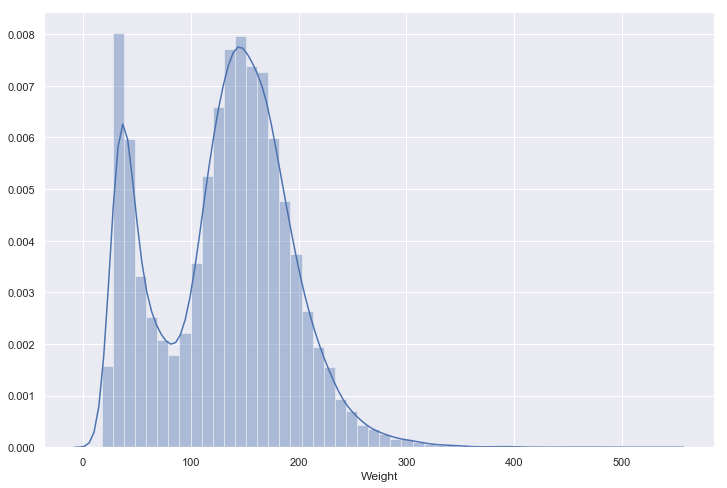

In [14]:
sns.distplot(nhanes["Weight"]);

If we want to look at only a histogram, we can just set the `kde` argument to `False`:

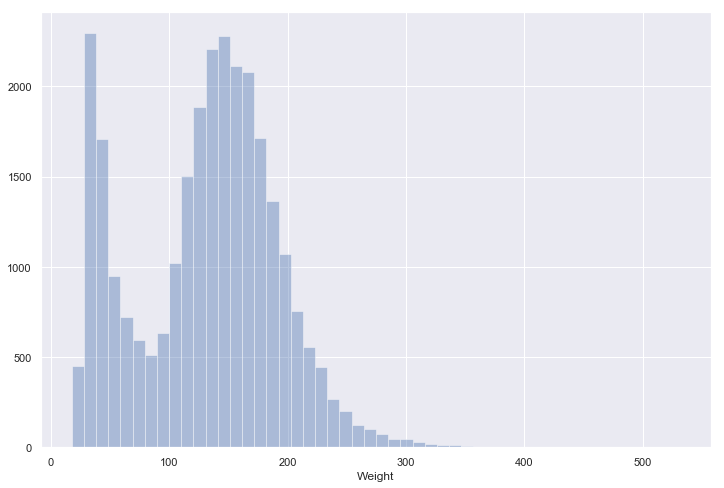

In [15]:
sns.distplot(nhanes["Weight"],kde=False);

---
## 4. Jointplots
`seaborn` also has some quick ways to combine both the univariate histogram/density plots and scatter plots from above using `jointplot()`. By default, this fucntion will plot a scatter plot and a histogram for two continuous x and y variables:

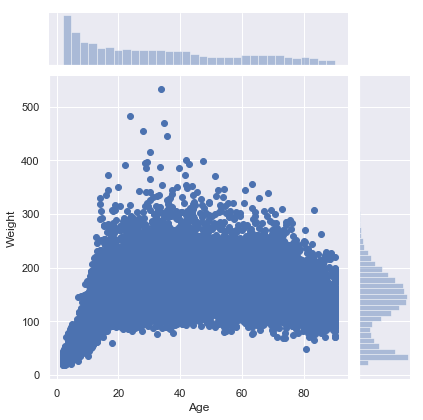

In [16]:
sns.jointplot(x="Age",y="Weight",data=nhanes);

We can also modify it to plot density estimates using the `kind` keyword:

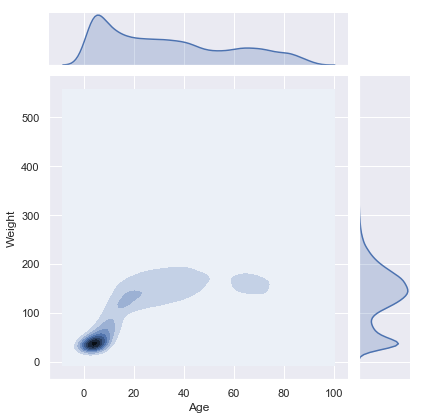

In [17]:
sns.jointplot(x="Age",y="Weight",data=nhanes,kind="kde");

---
## 4: Categorical plots

These types of plots are great for visualizing continuous x continuous data, but there are better ways to look at continuous x categorical data. For example, what if we want to look at the distribution of weights by region?

One way of doing this is by using the `catplot()` function. By default, this function will plot each data point grouped by our categorical variable with some jittering to help us differentiate points:

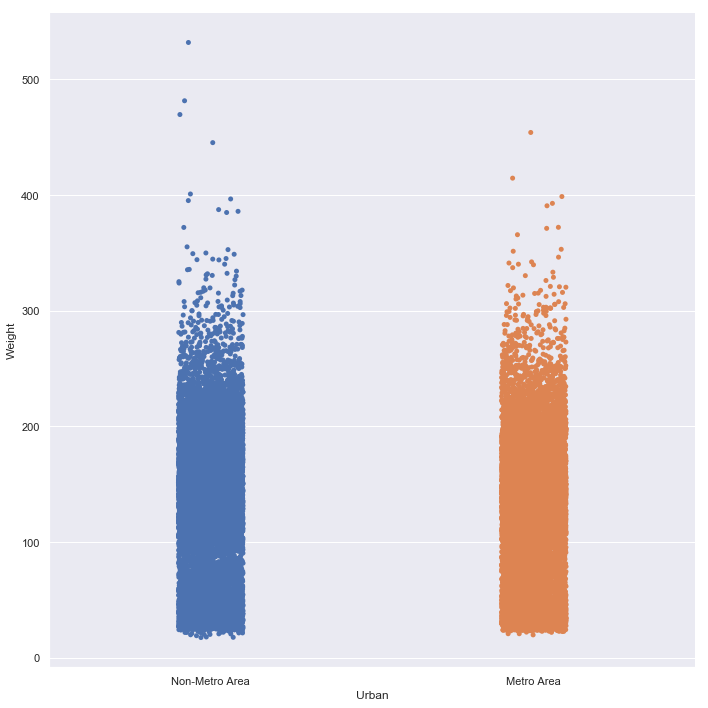

In [18]:
sns.catplot(x="Urban",y="Weight",data=nhanes,height=10);

It's kind of hard to see how the data is distributed because it is so dense, so let's change the size of the points using the `s` argument as well as the `alpha` value of each point to help with this:

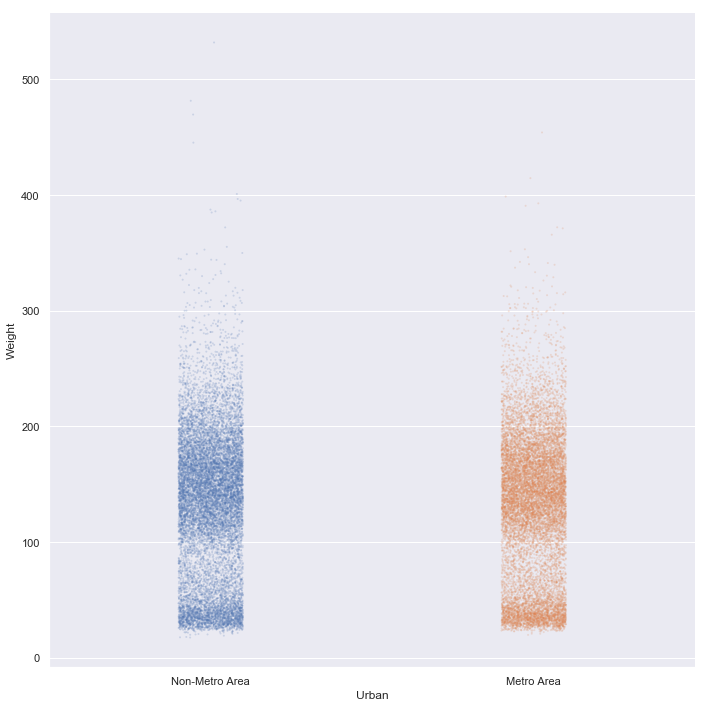

In [19]:
sns.catplot(x="Urban",y="Weight",data=nhanes,height=10,s=2,alpha=0.2);

### Categorial summary plots

There's still a lot of data here, so it might be easier to visualize this distribution using a summary tool. Fortunately, `catplot` makes it easy to change the type of plot by using the `kind` argument. We can change this plot to a traditional box and whisker plot:

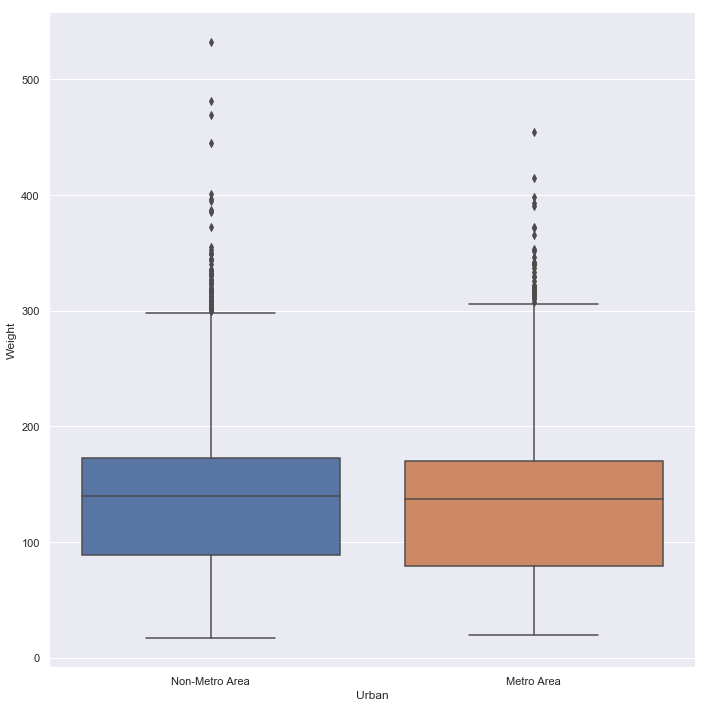

In [20]:
sns.catplot(x="Urban",y="Weight",data=nhanes,height=10,kind="box");

...or also more modern variations like a violin plot:

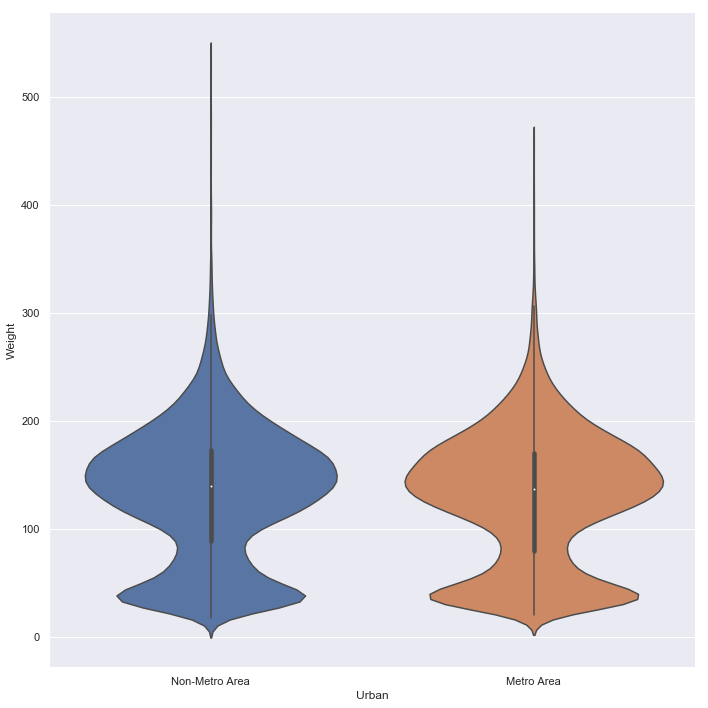

In [21]:
sns.catplot(x="Urban",y="Weight",data=nhanes,height=10,kind="violin");

Now we can really get a sense of how the weight variable is distributed by urban area.

Sometimes, particularly when there are many levels in your categorical variable, it's a lot easier to plot only the summary without much information about how the data is distributed. We can set `kind` equal to `point` in order to do this:

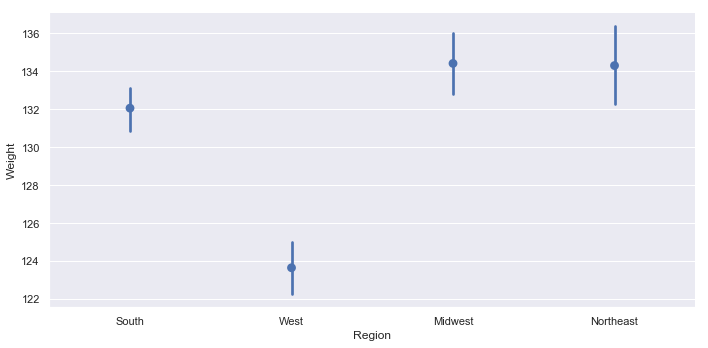

In [22]:
sns.catplot(x="Region",y="Weight",data=nhanes,aspect=2,kind="point",join=False);

Note that `seaborn` automatically calculates bootstrapped 95% confidence intervals in the representation of uncertainty on this plot.

What if we wanted to put both of these plots on top of each other? seaborn has each of the plot types in catplot() as individual functions (e.g. pointplot() and stripplot()). We can just use both of these functions to plot one on top of the other:

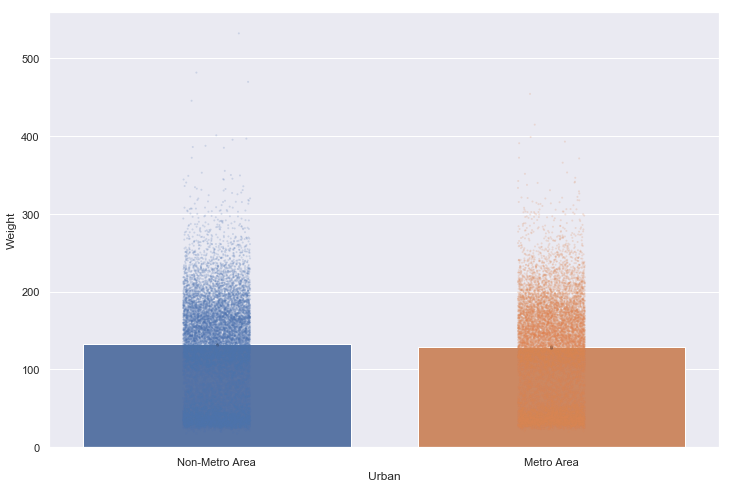

In [23]:
sns.barplot(x="Urban",y="Weight",data=nhanes)
sns.stripplot(x="Urban",y="Weight",data=nhanes,s=2,alpha=0.2);

---
## 5. Fitting linear models to the data

Let's say we think there might be a linear relationship between height and weight. We can use the `lmplot()` function to fit and visualize a line. By default, `seaborn` will use a 95% confidence interval on this line.

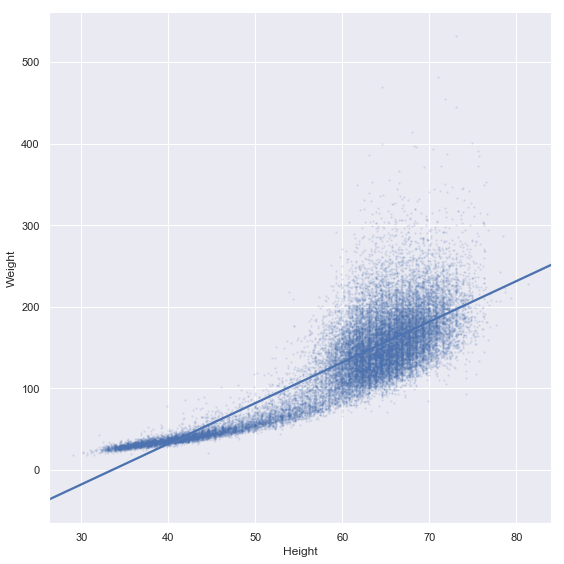

In [24]:
sns.lmplot(x="Height",y="Weight",data=nhanes,height=8,scatter_kws={'s':2,'alpha':0.1});

This model looks like it's extending a bit far beyond our actual data points. If we want to constrain the fit to only the the boundaries of our data, we can use the `truncate` argument:

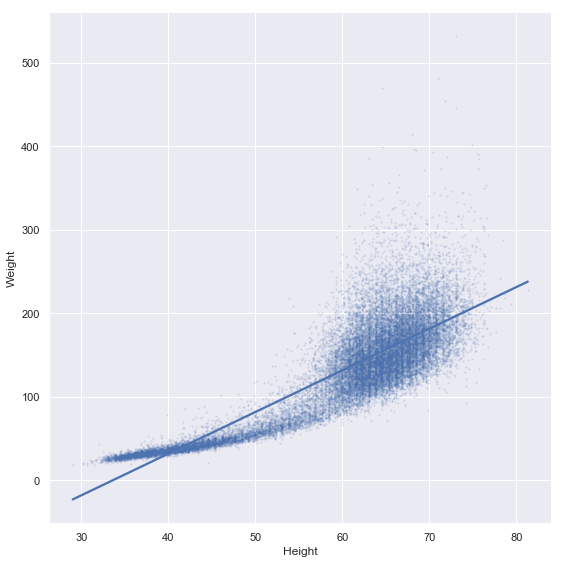

In [25]:
sns.lmplot(x="Height",y="Weight",data=nhanes,height=8,scatter_kws={'s':2,'alpha':0.1},
           truncate=True);

We might also want to break this relationship out by one of our categorical variables. We can do this by using either the `col` or `row` arguments:

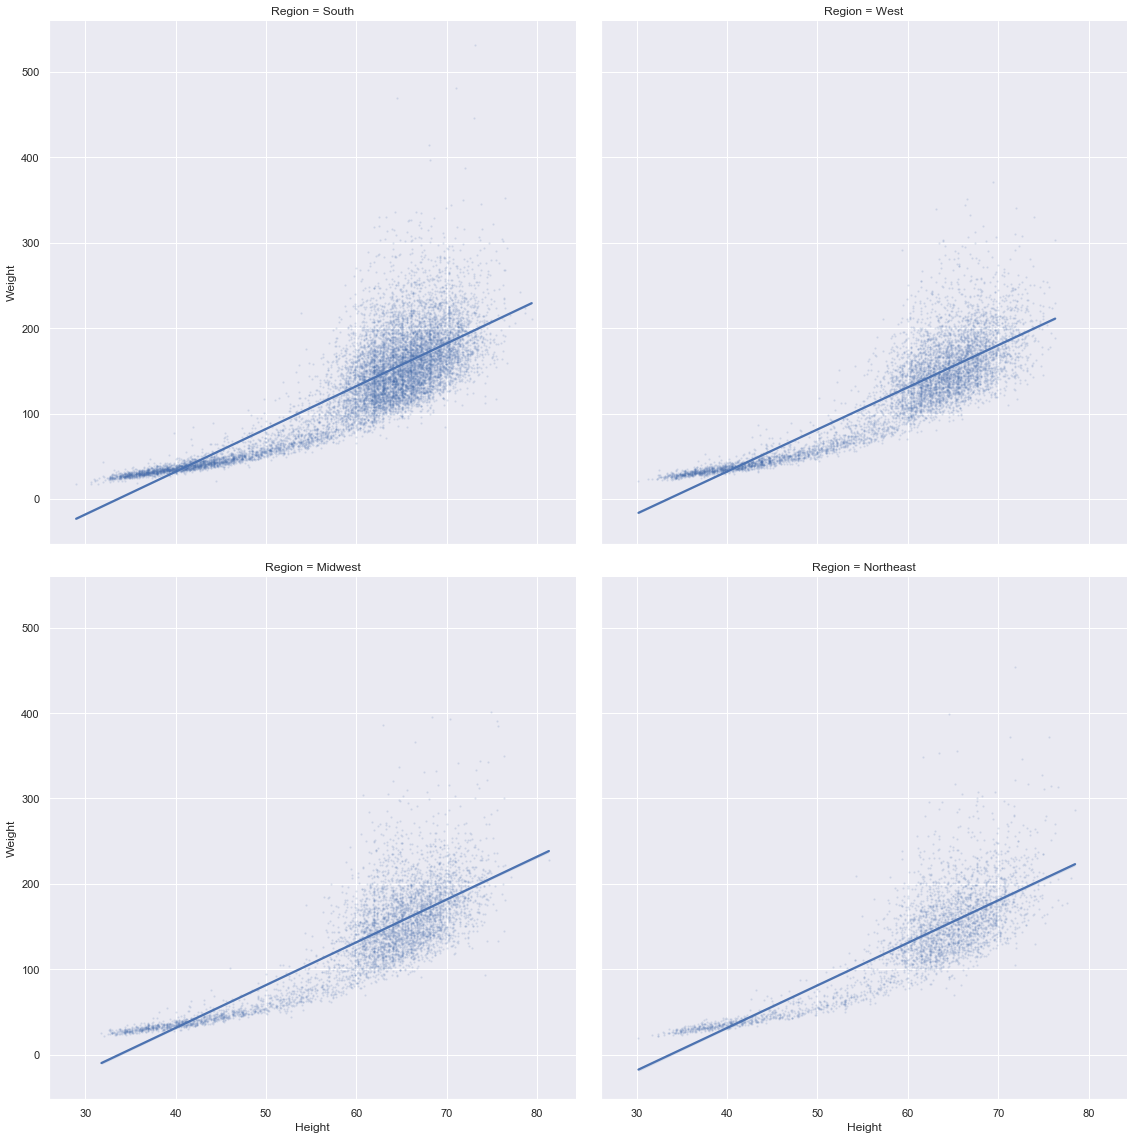

In [26]:
sns.lmplot(x="Height",y="Weight",data=nhanes,height=8,scatter_kws={'s':2,'alpha':0.1},
           truncate=True,col="Region",col_wrap=2);

We can further differentiate by color as well:

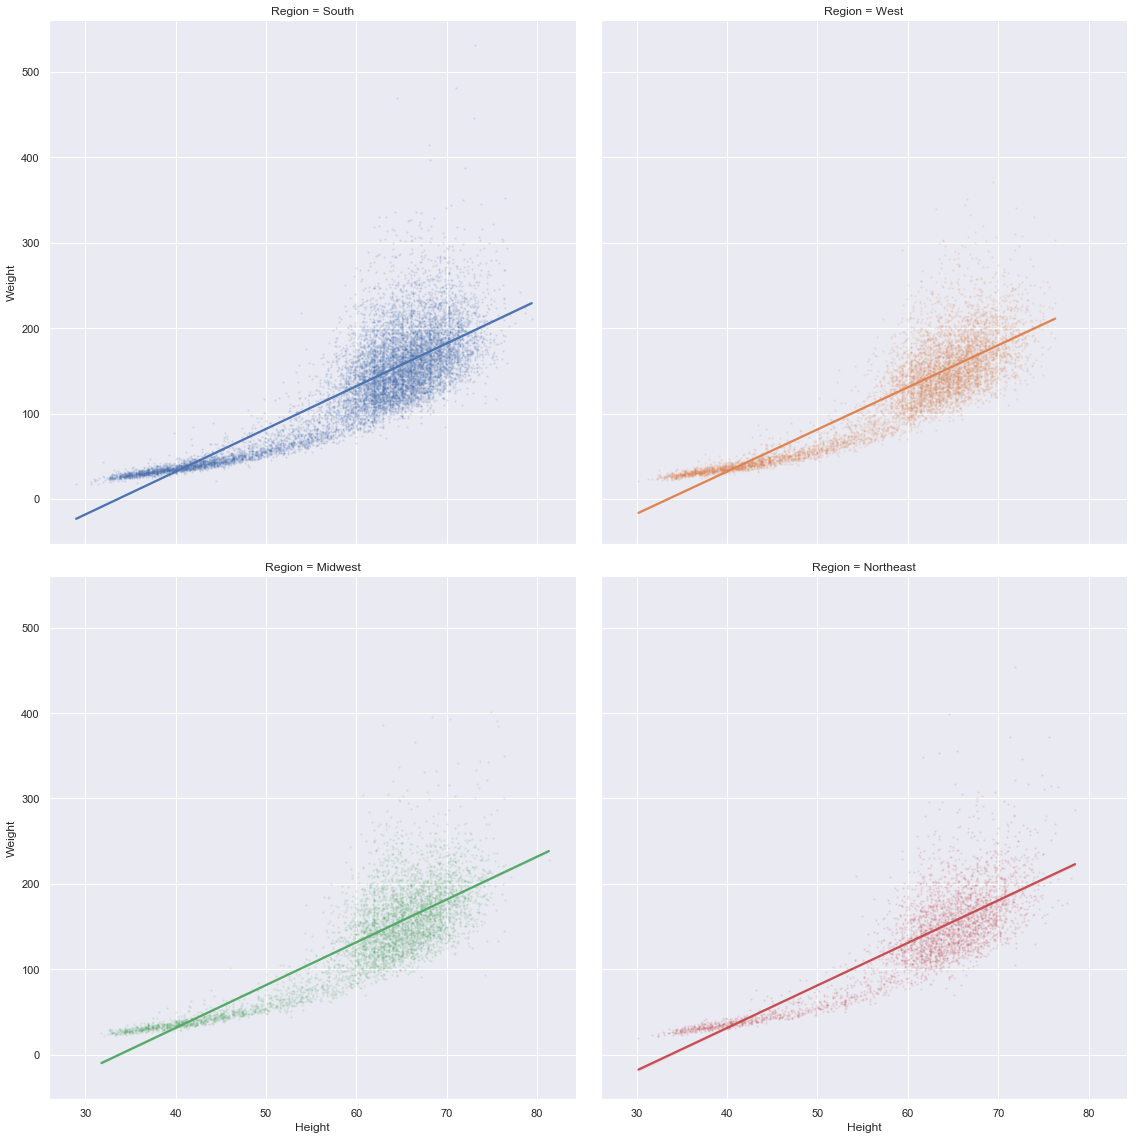

In [27]:
sns.lmplot(x="Height",y="Weight",data=nhanes,height=8,scatter_kws={'s':2,'alpha':0.1},
           truncate=True,col="Region",col_wrap=2,hue="Region");

We can also combine `col` with `row` to represent both of our categorical variables:

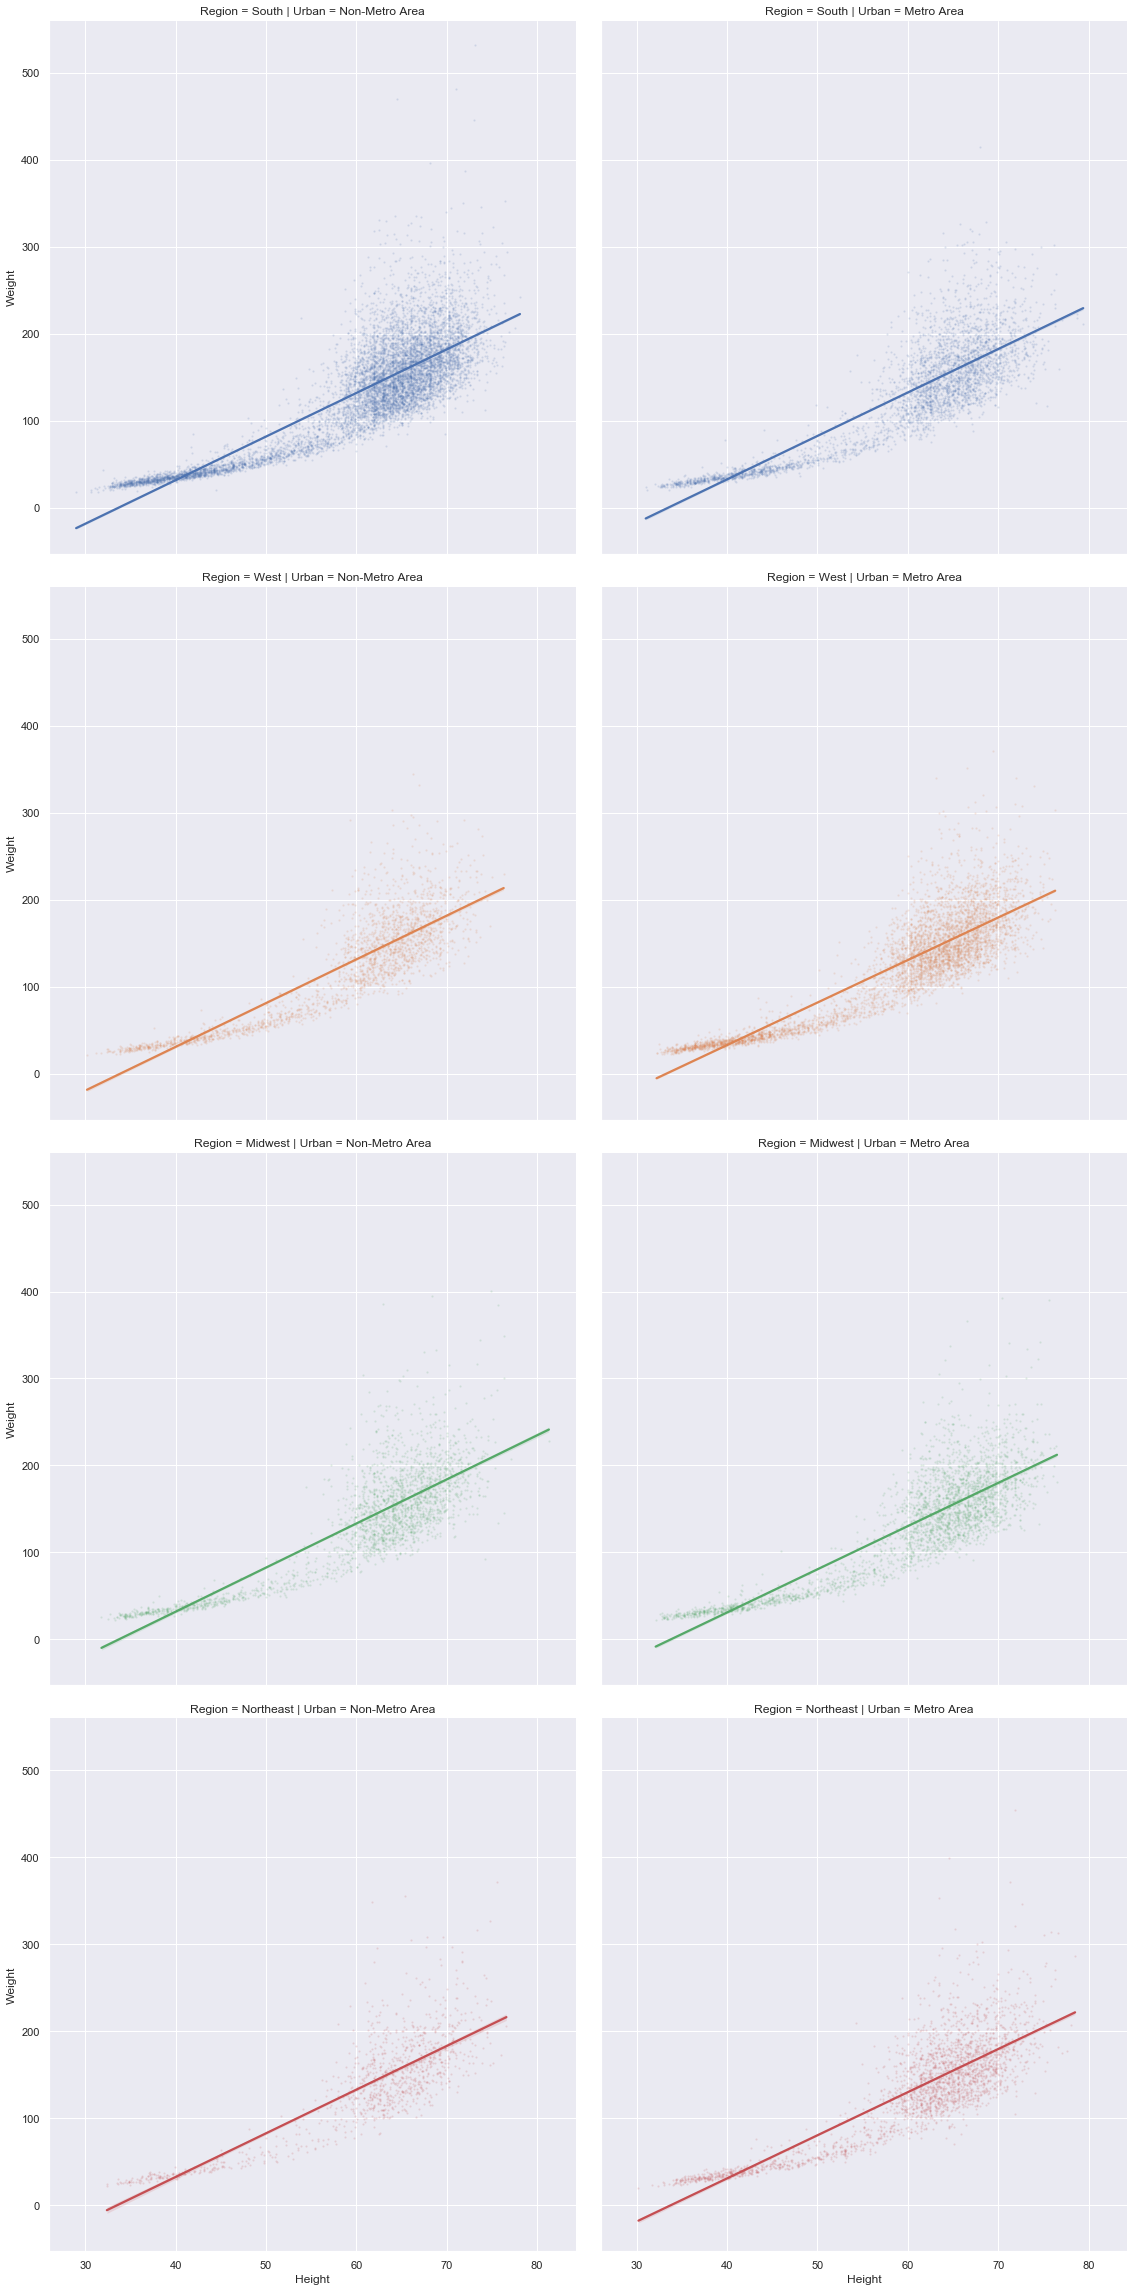

In [28]:
sns.lmplot(x="Height",y="Weight",data=nhanes,height=8,scatter_kws={'s':2,'alpha':0.1},
           truncate=True,col="Urban",row="Region",hue="Region");

---
## 6. Style

You might want to change the default style of plots. `seaborn` makes it easy to set style preferences for all of the plots in your notebook or script using the `set` function.

In [27]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pale

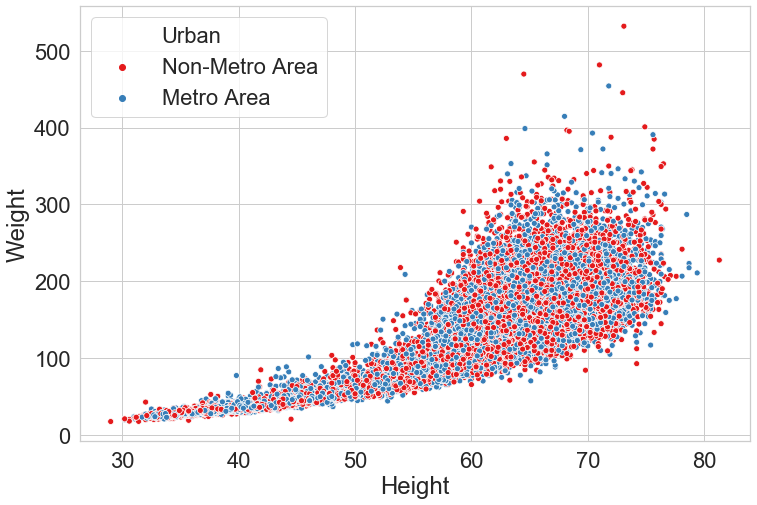

In [28]:
sns.set(style="whitegrid",font="Arial",palette="Set1",font_scale=2)

sns.scatterplot(x="Height",y="Weight",hue="Urban",data=nhanes);

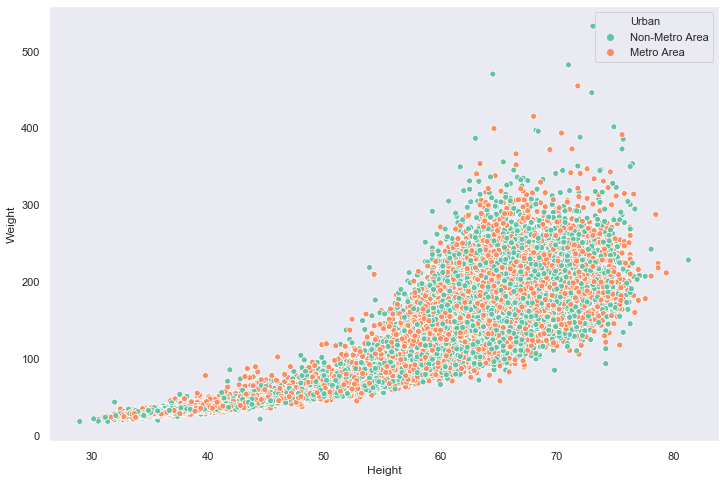

In [29]:
sns.set(style="dark",palette="Set2")
sns.scatterplot(x="Height",y="Weight",hue="Urban",data=nhanes);

Personally, I like to use the `ticks` style, and the `Arial` font, but there are many options you can choose from. You can also use the `despine` function to remove borders from the plot

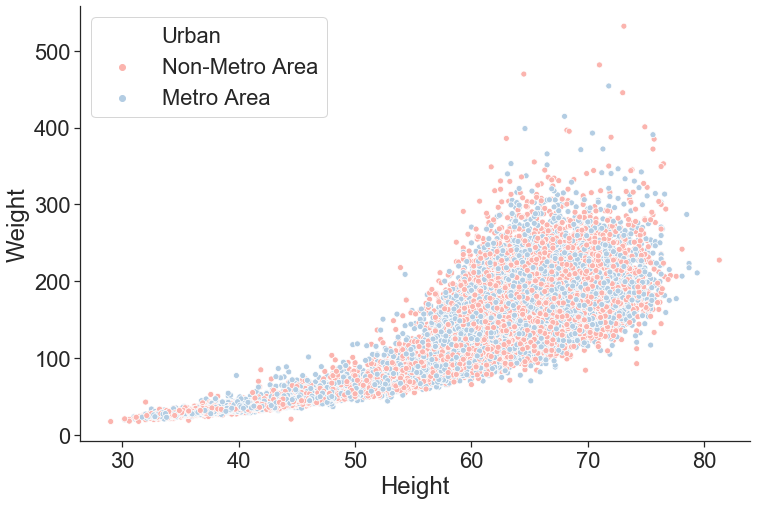

In [30]:
sns.set(style="ticks",font="Arial",palette="Pastel1",font_scale=2)
sns.scatterplot(x="Height",y="Weight",hue="Urban",data=nhanes);
sns.despine();

---
## 7. Titles and labels

In order to add a title and create more informative labels, we need to save the plot as an object using the `=` operator. We can then call the `set_{title,ylabel,xlabel}()` functions of this object to make the plots clearer.

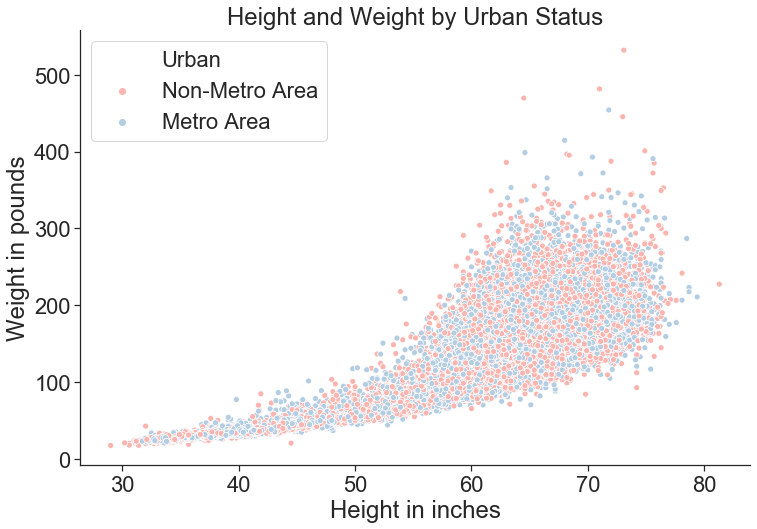

In [31]:
myPlot = sns.scatterplot(x="Height",y="Weight",hue="Urban",data=nhanes);
myPlot.set_title("Height and Weight by Urban Status")
myPlot.set_ylabel("Weight in pounds")
myPlot.set_xlabel("Height in inches")
sns.despine();

---
## 8. Saving your plots

To save your plot as a file, you can access the `savefig()` function from your plot object:

In [32]:
myPlot.figure.savefig("newPlotTest.pdf")

You can save plots in a variety of formats (like jpg or png) but using a vector format like pdf or svg is recommended.

---
## 9. Heatmaps

Sometimes a heatmap might be useful to look at the value of one variable based on a 2d grid of two other variables.

This is kind of a silly example, but say we wanted to map out the number of observations in our dataset as a factor of region and neighborhood type:

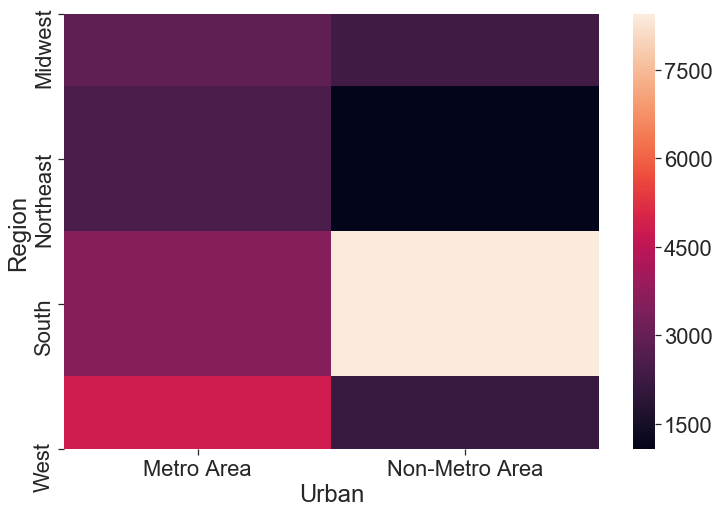

In [33]:
nhanesGroup = nhanes.groupby(["Region","Urban"]).size().reset_index(name="Observations")
nhanesGroup = nhanesGroup.pivot(index="Region",columns="Urban",values="Observations")
sns.heatmap(nhanesGroup);

---
## 9. Timeseries Plot

Lets make up some data on the prices of two different items from 1978-2017:

In [34]:
import numpy as np

priceData = []
for i in range(10):
    years = range(1978,2018)
    item1 = np.random.normal(100,5,40)
    item2 = range(1,41) + np.random.normal(100,5,40)
    priceData.append(pd.DataFrame({'years':years,'item1':item1,'item2':item2}))
priceData = pd.concat(priceData).reset_index()   
priceData = pd.melt(priceData,id_vars=['years'],var_name="item",value_vars=['item1','item2'],value_name="price")
priceData.to_csv("priceData.csv")

To save some time, I already generated this data. You can go ahead and load it from a csv file:

In [7]:
priceData = pd.read_csv("priceData.csv")

The function `lineplot()` can be used to visualize timeseries data using `seaborn`.  It's syntax is exactly like plots we've used above. In addition, this function automatically calculates 95% confidence intervals around each of our datapoints and displays them as a continuous ribbon around the mean line: 

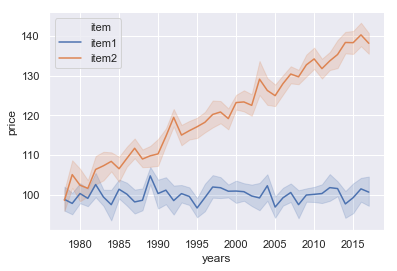

In [10]:
sns.lineplot(x="years",y="price",hue="item",data=priceData)
sns.despine();

---
## 10. Final points

While seaborn will get you very far, sometimes you might want to do something it doesn't allow for. Fortunately, seaborn is written on top of a more robust (but less high-level and user friendly) package called `matplotlib`, which is the backbone behind plotting data in Python. While beyond the scope of this tutorial, you can read more about matplotlib here: https://matplotlib.org/ 